In [1]:
import torch
from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection import retinanet_resnet50_fpn_v2, RetinaNet_ResNet50_FPN_V2_Weights
import matplotlib.pyplot as plt

In [2]:
torch.device('cuda')

device(type='cuda')

In [19]:
#import requests
#response = requests.get(r"C:\Bosch_Hackathon\Jpg\0000330.jpg")
#/open("obj_det1.jpeg", "wb").write(response.content)

img = read_image("C:/Bosch_Hackathon/Jpg/0000330.jpg")

In [20]:
weights = RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT
model = retinanet_resnet50_fpn_v2(weights=weights, score_thresh=0.35)

model.eval()

preprocess = weights.transforms()

In [21]:
model.eval()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [22]:
preprocess

ObjectDetection()

In [23]:
batch = [preprocess(img)]
prediction = model(batch)[0]

In [24]:
type(prediction)

dict

In [25]:
labels = [weights.meta["categories"][i] for i in prediction["labels"]]

In [26]:
labels

['car', 'truck', 'car', 'person', 'car', 'person', 'car', 'car', 'car', 'car']

In [27]:
from matplotlib.patches import Rectangle

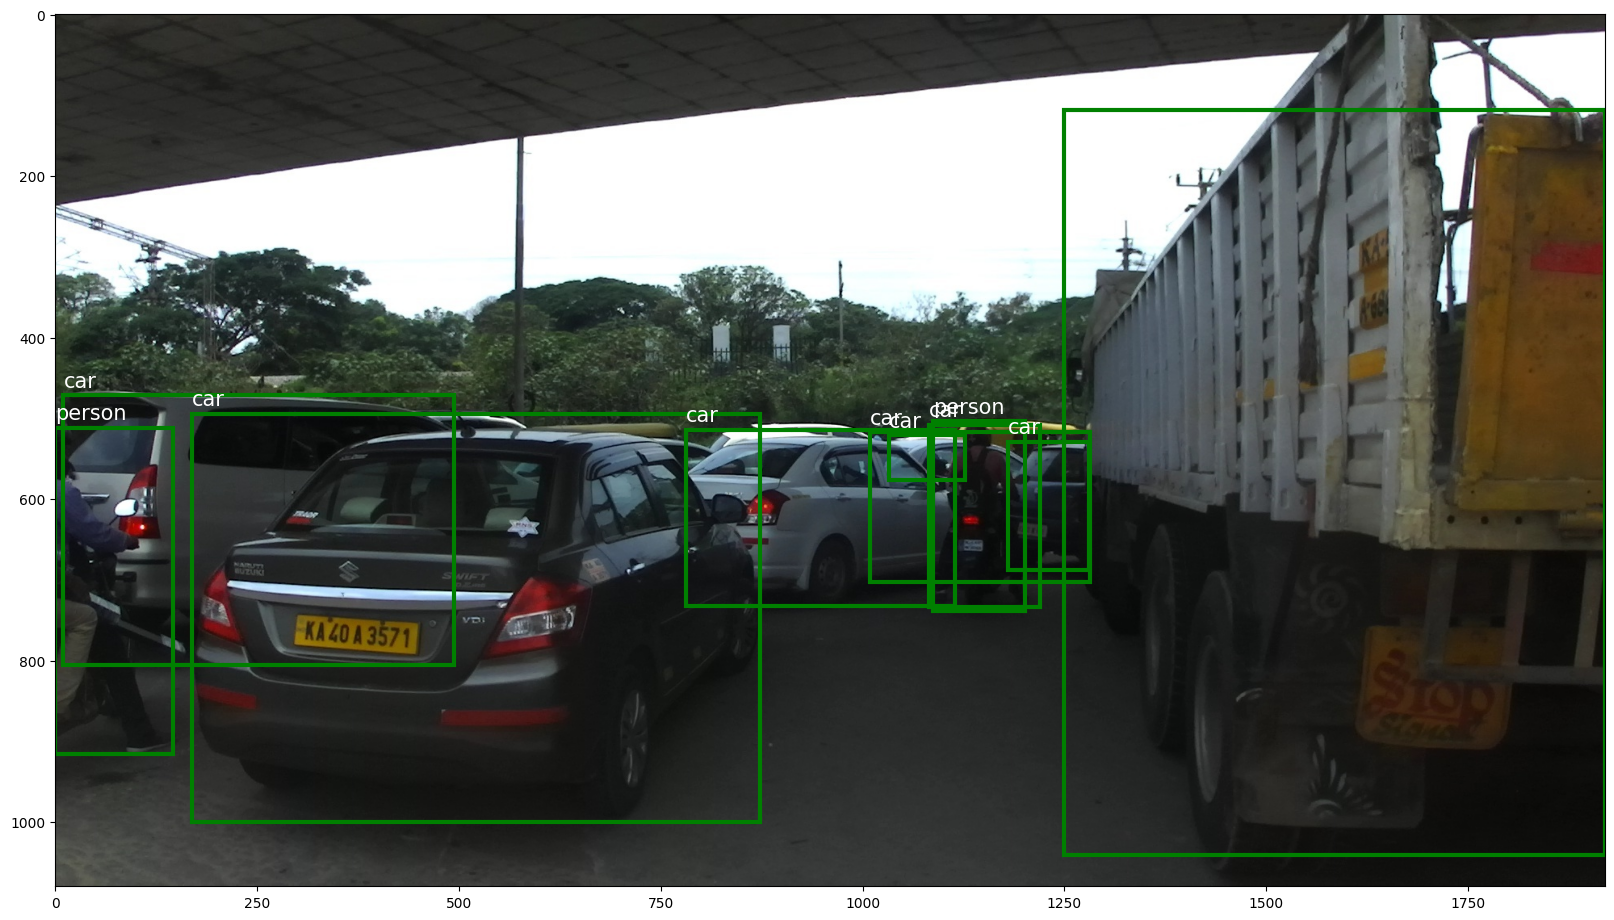

In [17]:
image = plt.imread("C:/Bosch_Hackathon/Jpg/0000330.jpg")

fig, ax = plt.subplots(figsize=(20,20))
for box, label in zip(prediction["boxes"], labels):
    x1, y1, x2, y2 = box.tolist()
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor="green", linewidth=3)
    ax.add_patch(rect)
    ax.text(x1, y1 - 10, label, fontsize=15, color="white")

# Display the image
plt.imshow(image)
plt.show()